In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install dateutil

ERROR: Could not find a version that satisfies the requirement dateutil (from versions: none)
ERROR: No matching distribution found for dateutil


In [ ]:
data = pd.read_excel('train_dataframes.xlsx', parse_dates=['datetime'], index_col='datetime', sheet_name=0)
data

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763,1397.5788
2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545,1350.5093
2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232,1308.7955


In [ ]:
data.drop(['weekend', 'dayOfWeek','holiday', 'hourOfDay', 'T2M_toc', 'week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'Holiday_ID'], axis=1, inplace=True)

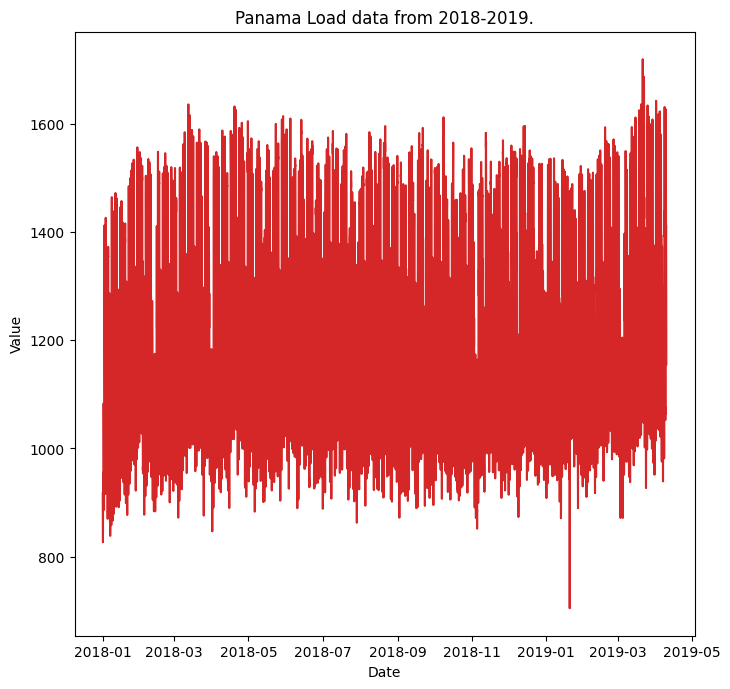

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(8,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(data, x=data.index, y=data['DEMAND'], title='Panama Load data from 2018-2019.')

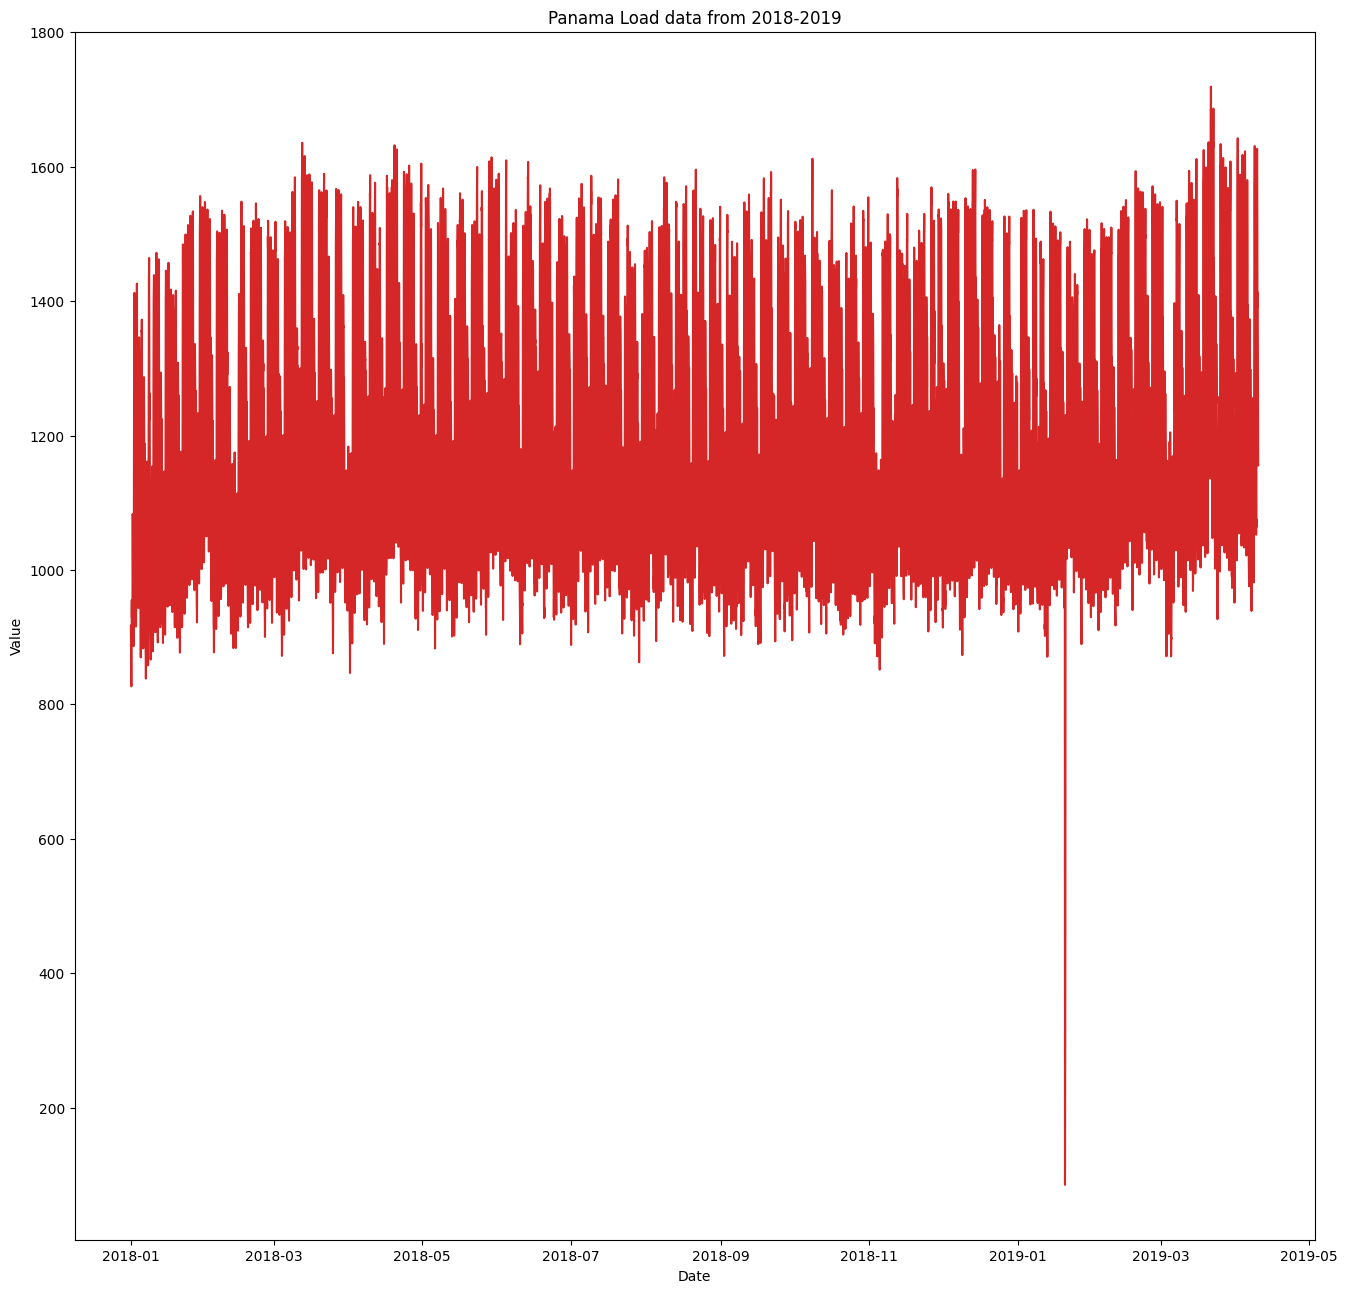

In [ ]:
plot_df(data, x=data.index, y=data['DEMAND'], title='Panama Load data from 2018-2019')


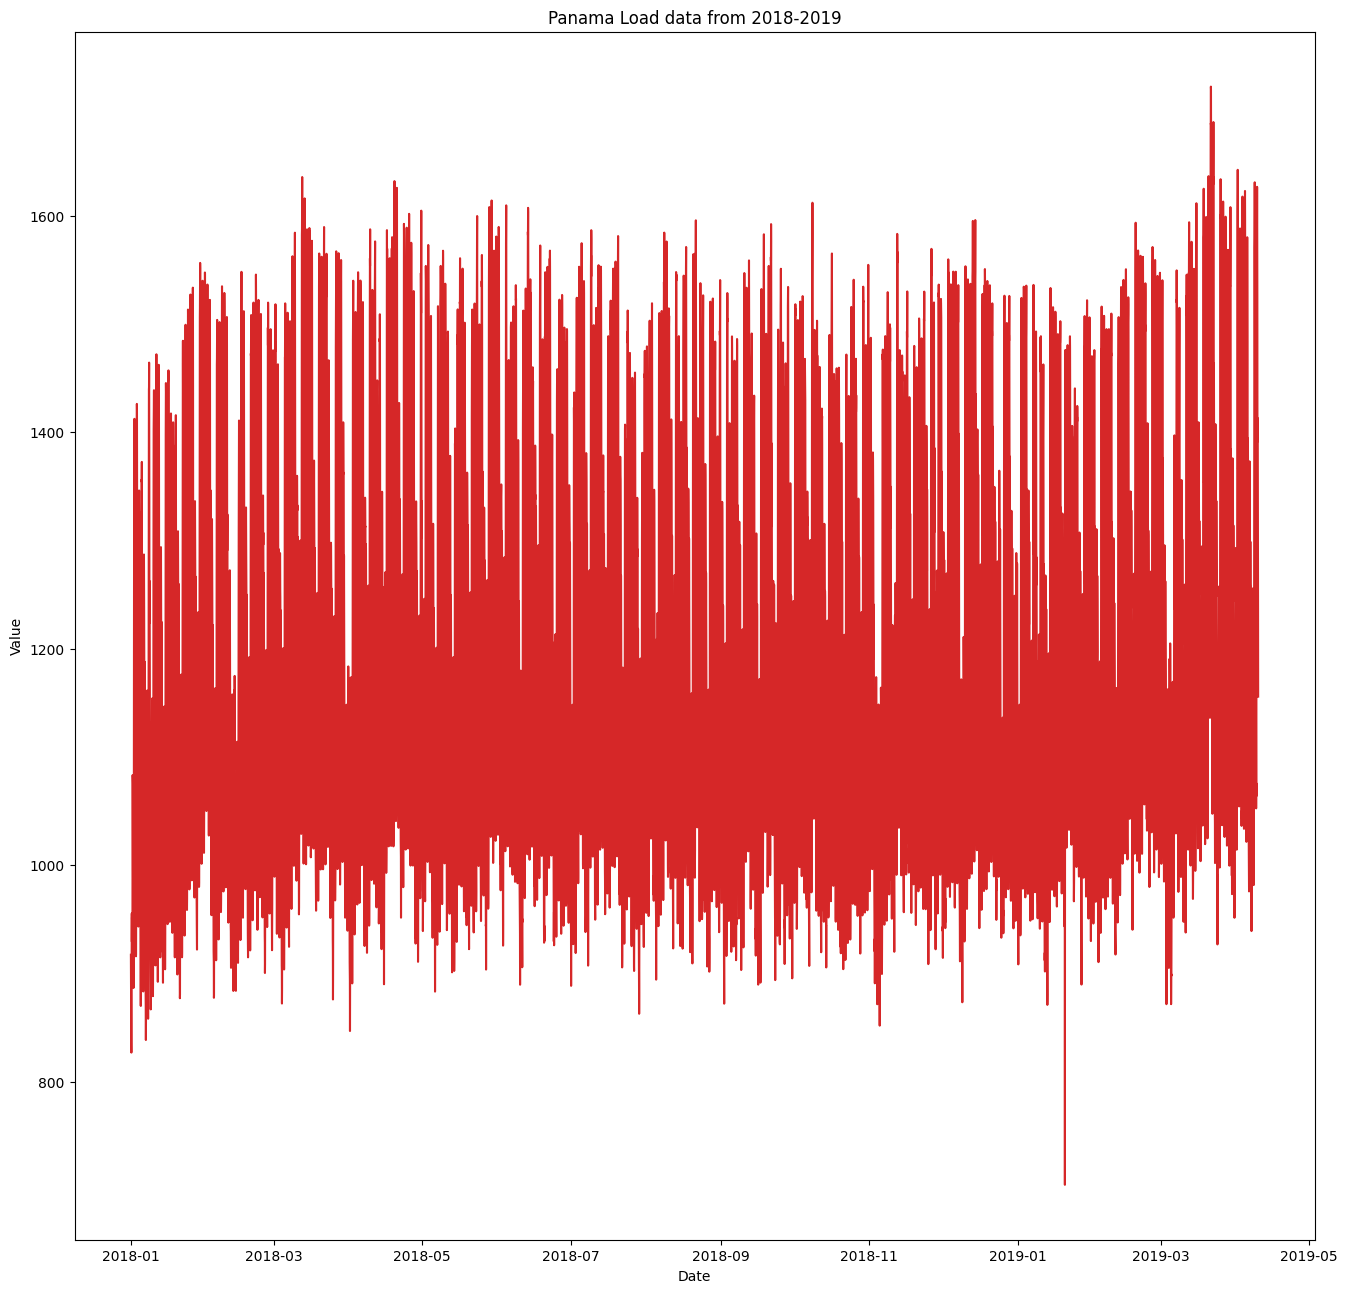

In [ ]:
plot_df(data, x=data.index, y=data['DEMAND'], title='Panama Load data from 2018-2019')


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [78]:
result_add = seasonal_decompose(data['DEMAND'][:3000], model='additive', extrapolate_trend='freq')

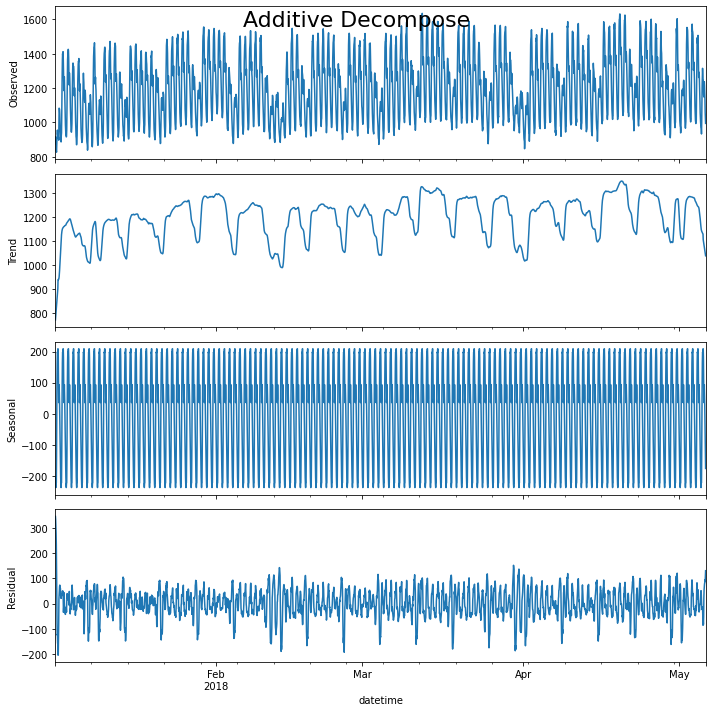

In [79]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()